In [1]:
# Importamos las librerias necesarias
import cv2 # Importamos OpenCV para procesamiento de imagenes
import numpy as np # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt # Importamos matplotlib para visualizacion
from google.colab.patches import cv2_imshow # Importamos funcion para mostrar imagenes en colab

In [2]:
# Cargar una imagen de ejemplo
from urllib.request import urlopen # para abrir URLs

In [3]:
# URL de una imagen de ejemplo
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array coomo una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga las imagenes en formato RGB, lo convertimos a RGB para visualizacion correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
#1. Recortar una imagen
# Definimos las corredenadas del recorte: [y_inicio:y_fin, x_inicio:x_fin]
y, x, _= image.shape # Obtenemos las dimensiones de la imagen
start_x, start_y = int(x * 0.25), int(y * 0.25) #Puntos de inicio (25% de cada dimension)
end_x, end_y = int(x * 0.75), int(y * 0.75) # Punto final (75% de cada dimension)
cropped_image = image_rgb[start_y:end_y, start_x:end_x] # Recortamos la region central

In [5]:
#2. Rendimensionar una imagen
# Definimos las nuevas dimensiones (ancho, alto)
new_width, new_height = 200, 200 # nuevas dimensiones para redimensionar
resized_image = cv2.resize(image_rgb, (new_width, new_height)) # Redimensionamos la imagen

In [11]:
# 3 Rotar una imagen
# Obtenemos las dimensiones de la imagen
height, width = image_rgb.shape[:2]
# Definimos el centro de la imagen
center = (width // 2, height // 2)
# Definimos la matriz de rotación: (centro, angulo, escala)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1) #Rotacion de 45°
# Aplicamos la transformación a fin para rotar la imagen
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (width, height))

In [12]:
#4. Voltear una imagen
# Voltemos horizontalmente(1 = horizontal, 0 = vertical, -1 = ambos)
flipped_h = cv2.flip(image_rgb, 1)
# Volteamos verticalmente
flipped_v = cv2.flip(image_rgb, 0)

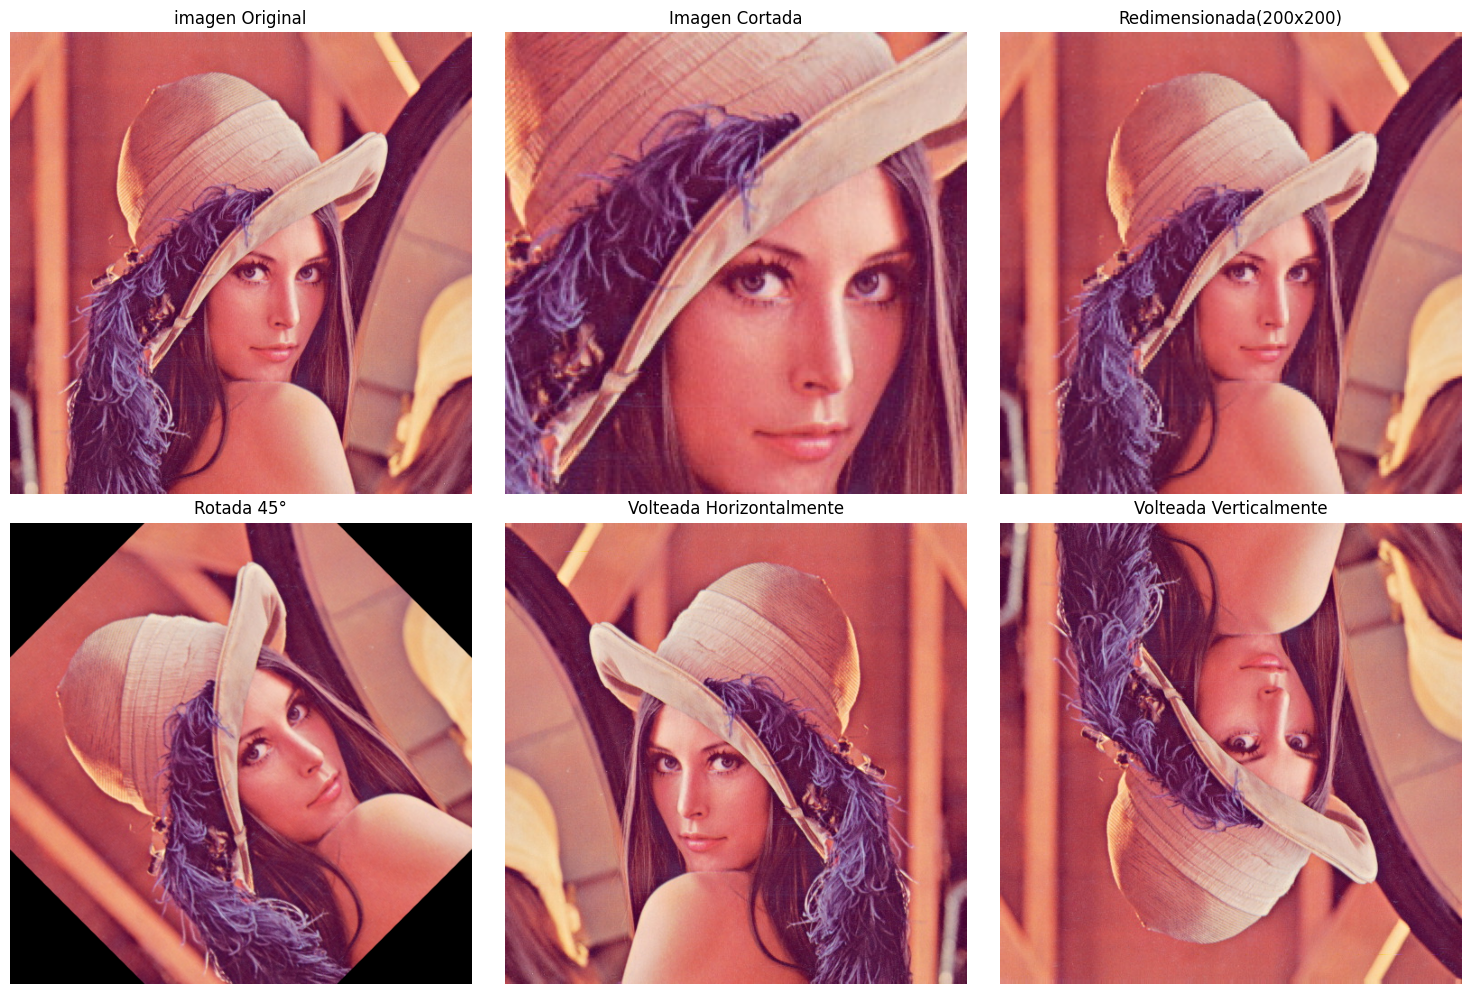

In [13]:
# Visualizacion de todas las operaciones
plt.figure(figsize=(15, 10)) # Creamos una figura con tamaño especifico

# Imagen original
plt.subplot(2, 3, 1) # Creamos un subplot en la posicion 1
plt.title('imagen Original') # Añadimos un titulo
plt.imshow(image_rgb) # Mostramos la imagen
plt.axis('off') # ocultamos los ejes

# Imagen cortada (posición 2)
plt.subplot(2, 3, 2)
plt.title('Imagen Cortada')
plt.imshow(cropped_image)
plt.axis('off')

# Imagen redimensionada
plt.subplot(2, 3, 3) # Creamos un subplot en la posicion 3
plt.title(f'Redimensionada({new_width}x{new_height})') # Añadimos un titulo
plt.imshow(resized_image) # Mostramos la imagen redimensionada
plt.axis('off')

# Imagen Rotada
plt.subplot(2, 3, 4) # Creamos un subplot en la posicion 4
plt.title('Rotada 45°') # Añadimos un titulo
plt.imshow(rotated_image) # Mostramos la imagen rotada
plt.axis('off') # Ocultamos los ejes

# Imagen volteada horizontalmente
plt.subplot(2, 3, 5) # Creamos un subplot en la posicion 5
plt.title('Volteada Horizontalmente') # Añadimos un titulo
plt.imshow(flipped_h) # Mostramos la imagen volteada verticalmente
plt.axis('off') # Ocultamos losejes

# Imagen volteda verticlamnete
plt.subplot(2, 3, 6) # Creamos un subplot en laposicion 6
plt.title('Volteada Verticalmente') # Añadimos un titulo
plt.imshow(flipped_v) # Mostramos la imagen volteada verticalmete
plt.axis('off') # Ocultamos los ejes

plt.tight_layout() # Ajustamos el layout para que no se superpona los titulos
plt.show()

In [14]:
# Imprimimos info de las imagenes
print(f"Dimensiones de la imagen original: {image_rgb.shape}") # Alto ancho canales
print(f"Dimensiones de la imagen recortada: {cropped_image.shape}") # Alto ancho canales
print(f"Dimensiones de la imagen redimensionada: {resized_image.shape}") # Alto ancho cananles

Dimensiones de la imagen original: (512, 512, 3)
Dimensiones de la imagen recortada: (256, 256, 3)
Dimensiones de la imagen redimensionada: (200, 200, 3)
